<a href="https://colab.research.google.com/github/Aiengineer360/HeartDisease_analysis/blob/main/UCI_Heart_Disease_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Heart Disease Analysis

####Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
heart_disease_df = pd.read_csv('heart_disease_uci.csv')

####Rows and Columns in Dataset

In [3]:
heart_disease_df.shape

(920, 16)

####Missing values

In [4]:
heart_disease_df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


####Count of patients with and without Heart Disease

In [5]:
target_distribution = heart_disease_df['num'].value_counts()
patients_with_disease = target_distribution.get(1, 0)
patients_without_disease = target_distribution.get(0, 0)
target_distribution, patients_with_disease, patients_without_disease

(num
 0    411
 1    265
 2    109
 3    107
 4     28
 Name: count, dtype: int64,
 265,
 411)

####Age Distribution of heart disease

In [6]:
# Determine the age range of patients in the dataset
age_min = heart_disease_df['age'].min()
age_max = heart_disease_df['age'].max()

age_min, age_max


(28, 77)

####Gender Distribution

In [7]:
# Determine the gender distribution (assuming 0 = female, 1 = male)
gender_distribution = heart_disease_df['sex'].value_counts()

gender_distribution

,count
sex,
Male,726
Female,194


####Average
#####○ Resting blood pressure (trestbps)
#####○ Serum cholesterol (chol)
#####○ Maximum heart rate (thalach)

In [8]:
# Calculate the average for the specified health metrics
average_trestbps = heart_disease_df['trestbps'].mean()
average_chol = heart_disease_df['chol'].mean()
average_thalach = heart_disease_df['thalch'].mean()

(average_trestbps, average_chol, average_thalach)


(132.13240418118468, 199.13033707865168, 137.5456647398844)

####Median:
#####○ Resting blood pressure (trestbps)
#####○ Serum cholesterol (chol)
#####○ Maximum heart rate (thalach)

In [9]:
median_trestbps = heart_disease_df['trestbps'].median()
median_chol = heart_disease_df['chol'].median()
median_thalach = heart_disease_df['thalch'].median()

(median_trestbps, median_chol, median_thalach)

(130.0, 223.0, 140.0)

####Count of patients with and without exercise-induced angina

In [10]:
# Calculate the count of patients with and without exercise-induced angina (exang: 1 = yes, 0 = no)
exercise_induced_angina = heart_disease_df['exang'].value_counts()

# Accessing values using .loc to avoid the FutureWarning
patients_with_angina = exercise_induced_angina.loc[1] if 1 in exercise_induced_angina.index else 0
patients_without_angina = exercise_induced_angina.loc[0] if 0 in exercise_induced_angina.index else 0

exercise_induced_angina, patients_with_angina, patients_without_angina


(exang
 False    528
 True     337
 Name: count, dtype: int64,
 337,
 528)

####Counts of Chest Pain Types

In [11]:
# Calculate the counts of different chest pain types (cp)
chest_pain_counts = heart_disease_df['cp'].value_counts()

chest_pain_counts


,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


####Age distribution of patients

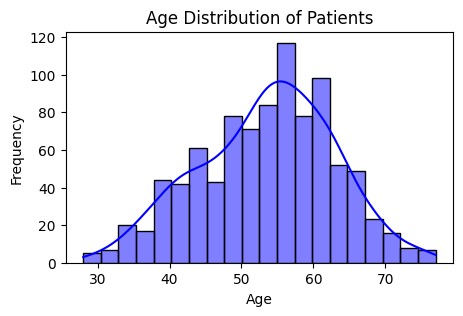

In [12]:
# Plotting age distribution
plt.figure(figsize=(5,3))
sns.histplot(heart_disease_df['age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

####Graph between Average Cholesterol Levels: With vs. Without Heart Disease

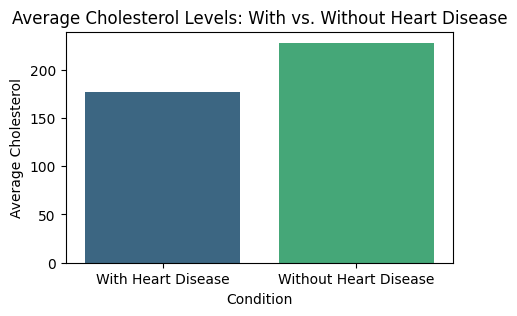

In [16]:
# Divide patients into groups: with and without heart disease
patients_with_disease = heart_disease_df[heart_disease_df['num'] > 0]
patients_without_disease = heart_disease_df[heart_disease_df['num'] == 0]

# Calculate average cholesterol levels
avg_chol_with_disease = patients_with_disease['chol'].mean()
avg_chol_without_disease = patients_without_disease['chol'].mean()

# Create a DataFrame for the bar plot
chol_df = pd.DataFrame({  # Creating the chol_df DataFrame
    'Condition': ['With Heart Disease', 'Without Heart Disease'],
    'Average Cholesterol': [avg_chol_with_disease, avg_chol_without_disease]
})

# Corrected visualization for average cholesterol levels
plt.figure(figsize=(5, 3))
sns.barplot(
    x='Condition',
    y='Average Cholesterol',
    hue='Condition',  # Assign x variable to hue
    data=chol_df,  # Use the created DataFrame
    dodge=False,      # Disable dodge since hue is the same as x
    legend=False,     # Disable legend
    palette='viridis'
)
plt.title('Average Cholesterol Levels: With vs. Without Heart Disease')
plt.xlabel('Condition')
plt.ylabel('Average Cholesterol')
plt.show()

####Define the IQR and Outlier Detection Function



In [17]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)  # First quartile
    Q3 = series.quantile(0.75)  # Third quartile
    IQR = Q3 - Q1              # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

####Identify Outliers in chol and trestbps

In [19]:
# Detect outliers
chol_outliers = detect_outliers(heart_disease_df['chol'])
trestbps_outliers = detect_outliers(heart_disease_df['trestbps'])

# Results
print(f"Number of outliers in cholesterol: {len(chol_outliers)}")
print(f"Number of outliers in resting blood pressure: {len(trestbps_outliers)}")

# Display the outlier values if needed
print("Cholesterol Outliers:", chol_outliers.values)
print("Resting Blood Pressure Outliers:", trestbps_outliers.values)

Number of outliers in cholesterol: 183
Number of outliers in resting blood pressure: 28
Cholesterol Outliers: [417. 564. 409. 412. 468. 466. 529. 603. 518. 491.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   

####Visualize Outliers with Boxplots

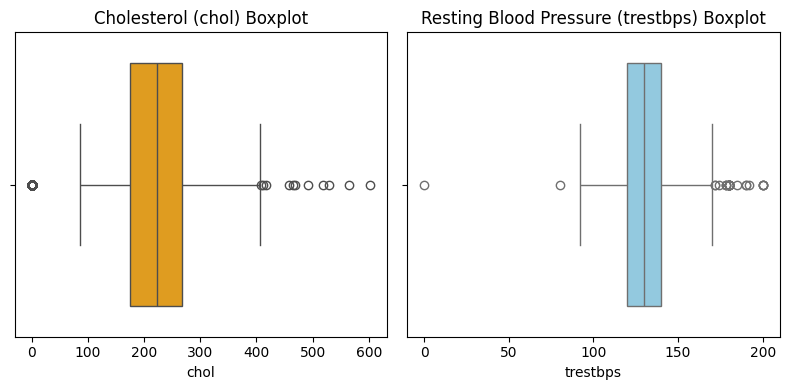

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots to visualize outliers
plt.figure(figsize=(8, 4))

# Cholesterol boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=heart_disease_df['chol'], color='orange')
plt.title('Cholesterol (chol) Boxplot')

# Resting blood pressure boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=heart_disease_df['trestbps'], color='skyblue')
plt.title('Resting Blood Pressure (trestbps) Boxplot')

plt.tight_layout()
plt.show()